In [4]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import statsmodels.stats.weightstats as wsts
import statsmodels.stats.proportion as psts

import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns


___
# 1 V
В данном задании вам нужно будет проанализировать АБ тест, проведенный на реальных пользователях Яндекса
подтвердить или опровергнуть наличие изменений в пользовательском поведении между контрольной (control) и тестовой (exp) группами
определить характер этих изменений и практическую значимость вводимого изменения
понять, какая из пользовательских групп более всего проигрывает / выигрывает от тестируемого изменения (локализовать изменение)

Описание данных:

- userID: уникальный идентификатор пользователя
- browser: браузер, который использовал userID
- slot: в каком статусе пользователь участвовал в исследовании (exp = видел измененную страницу, control = видел неизменную страницу)
- n_clicks: количество кликов, которые пользоваль совершил за n_queries
- n_queries: количество запросов, который совершил userID, пользуясь браузером browser
- n_nonclk_queries: количество запросов пользователя, в которых им не было совершено ни одного клика

Обращаем ваше внимание, что не все люди используют только один браузер, поэтому в столбце userID есть повторяющиеся идентификаторы. В предлагаемых данных уникальным является сочетание userID и browser.

Основная метрика, на которой мы сосредоточимся в этой работе, — это количество пользовательских кликов на web-странице в зависимости от тестируемого изменения этой страницы.

Посчитайте, насколько в группе exp больше пользовательских кликов по сравнению с группой control в процентах от числа кликов в контрольной группе.

Полученный процент округлите до третьего знака после точки.

In [5]:
df = pd.read_csv('data/ab_browser_test.csv')
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [275]:
e_group = df[df.slot == 'exp']
c_group = df[df.slot == 'control']
print(
    f'How much is the \
    fish: {100 * e_group.n_clicks.sum() / c_group.n_clicks.sum():.3f}')

How much is the     fish: 101.614


___
# 2 V
Давайте попробуем посмотреть более внимательно на разницу между двумя группами (control и exp) относительно количества пользовательских кликов.

Для этого постройте с помощью бутстрепа 95% доверительный интервал для средних значений и медиан количества кликов в каждой из двух групп. Отметьте все верные утверждения.

- [X] 95% доверительный интервал для разности медиан не содержит ноль, похоже, медианы отличаются статистически значимо
- [ ] 95% доверительный интервал для разности средних содержит ноль, похоже, средние существенно не отличаются
- [X] 95% доверительный интервал для разности средних не содержит ноль, похоже, средние отличаются статистически значимо
- [ ] 95% доверительный интервал для разности медиан содержит ноль, похоже, медианы существенно не отличаются
- [ ] Применение bootstrap на выборках такого большого размера неправомерно, потому что bootstrap делает псведовыборки с возвращениями, а с ростом объема исходной выборки псведовыборки с возвращениями становятся более похожими на псведовыборки без возвращения.

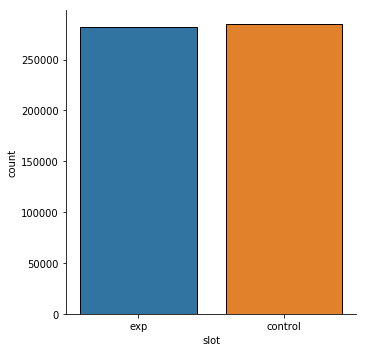

In [9]:
plt.hist()

In [17]:
import bootstrap as boot

In [43]:
e_group_nclicks_boot = boot.get_bootstrap_samples(
    e_group.n_clicks, 1000)
c_group_nclicks_boot = boot.get_bootstrap_samples(
    c_group.n_clicks, 1000)

In [44]:
e_group_med = np.apply_along_axis(np.median, 1, e_group_nclicks_boot)
c_group_med = np.apply_along_axis(np.median, 1, c_group_nclicks_boot)
e_group_mean = np.apply_along_axis(np.mean, 1, e_group_nclicks_boot)
c_group_mean = np.apply_along_axis(np.mean, 1, c_group_nclicks_boot)
print('Median conf interval:',
      boot.tolerance_int(e_group_med - c_group_med, 0.05))
print('Mean conf interval:',
      boot.tolerance_int(e_group_mean - c_group_mean, 0.05))

Median conf interval: [1. 1.]
Mean conf interval: [0.19978078 0.40580319]


___
# 3 V
Поскольку данных достаточно много (порядка полумиллиона уникальных пользователей), отличие в несколько процентов может быть не только практически значимым, но и значимым статистически. Последнее утверждение нуждается в дополнительной проверке.

Посмотрите на выданные вам данные и выберите все верные варианты ответа относительно проверки гипотезы о равенстве среднего количества кликов в группах.

- [ ] Гипотезу о равенстве средних между двумя выборками можно проверить с помощью построения доверительного интервала для среднего объединенной выборки, потому что в силу большого объема выборки этот интервал будет очень точным, и мы сможем надежно оценить необходимый доверительный интервал
- [ ] Для проверки гипотезы о равенстве средних категорически нельзя использовать t-критерий Стьюдента ни при каком размере выборки, потому что количество кликов, которые мы исследуем, больше походят на распределение Пуассона, которое сильно отличается от нормального.
- [ ] Используя центральную предельную теорему, мы можем заключить, что с ростом объема выборки любое исследуемое распределение, становится похожим на нормальное, а значит, учитывая большой объем нашей выборки, оптимальным критерием в нашей задаче будет z-критерий.
- [ ] Для проверки гипотезы о равенстве средних в данной задаче можно использовать только параметрические критерии, потому что непараметрические, как известно, с увеличением размера выборки могут давать непредсказуемые результаты в силу случайности в определении их нулевого распределения.
- [X] Все ответы неверны

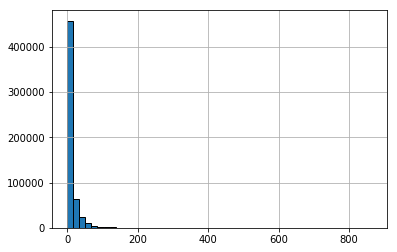

In [46]:
df.n_clicks.hist(bins=50)

___
# 4 V
t-критерий Стьюдента имеет множество достоинств, и потому его достаточно часто применяют в AB экспериментах. Иногда его применение может быть необоснованно из-за сильной скошенности распределения данных.

Давайте постараемся понять, когда t-критерий можно применять и как это проверить на реальных данных.

Для простоты рассмотрим одновыборочный t-критерий. Его статистика имеет вид $\frac{\bar X - \mu}{\sqrt{S^2 / n}}$, то есть чтобы действительно предположения t-критерия выполнялись необходимо, чтобы:
- [X] $\bar X$ — среднее значение в выборке было распределено нормально $\mathcal{N}(\mu, \frac{\sigma^2}{n})$ 
- [X] $\frac{n}{\sigma^2}S^2$ — несмещенная оценка дисперсии с масштабируемым коэффициентом была распределена по хи-квадрат с n-1 степенями свободы: $\chi^2(n-1)$

Оба этих предположения можно проверить с помощью бутстрепа. Ограничимся сейчас только контрольной группой, в которой распределение кликов будем называть данными в рамках данного вопроса.

Поскольку мы не знаем истинного распределения генеральной совокупности, мы можем применить бутстреп, чтобы понять, как распределены среднее значение и выборочная дисперсия. Для этого

1. Получите из данных n_boot_samples псевдовыборок.
1. По каждой из этих выборок посчитайте среднее и сумму квадратов отклонения от выборочного среднего (control_boot_chi_squared)
1. Для получившегося вектора средних значений из n_boot_samples постройте q-q plot с помощью scipy.stats.probplot для нормального распределения
1. Для получившегося вектора сумм квадратов отклонения от выборочного среднего постройте qq-plot с помощью scipy.stats.probplot для хи-квадрат распределения с помощью команды

In [80]:
np.random.seed(0)
thousand_boot_samples = boot.get_bootstrap_samples(c_group.n_clicks, 500)
thousand_boot_samples.shape

(500, 284554)

In [81]:
n = thousand_boot_samples.shape[0]
mu_boot = np.mean(thousand_boot_samples, axis=1)
sqerr_boot = np.var(thousand_boot_samples, axis=1) * \
    thousand_boot_samples.shape[1]

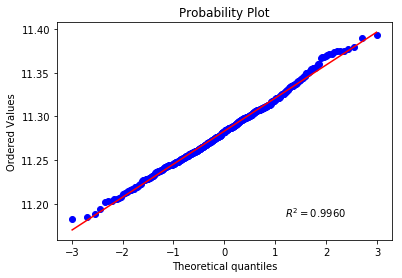

In [82]:
sts.probplot(mu_boot, plot=plt, rvalue=True);

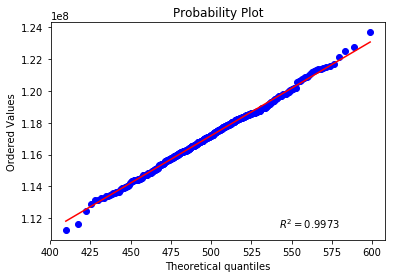

In [83]:
sts.probplot(sqerr_boot, dist='chi2',
             sparams=(n-1), plot=plt,
             rvalue=True);

В качестве ответа отметьте верные утвердения о значениях $R^2$
 , которые генерирует scipy.stats.probplot при отображении qq-графиков: одно c графика для среднего и одно с графика для выборочной суммы квадратов отклонения от выборочной суммы.

### Почему мы проверяем именно такие условия?

- В исходной постановке t-критерий требует нормальности распределения $X_i$. Именно из-за этого предположения мы имеем, что $\sum_i X_i \sim \mathcal{N}(n\mu,n\sigma^2)$ в силу линейности матожидания, независимости всех $X_i$ между собой и того факта, что сумма нескольких номальных слусайных величин также нормальна.

- Поэтому, пользуясь опять формальными свойствами матожидания и дисперсии можем записать, что $\frac{1}{n}\sum_i X_i - \mu \sim \mathcal{N}(0, \frac{\sigma^2}{n})$

- Заметим, что следующие распределения эквивалентны: $\mathcal{N}(0,\frac{\sigma^2}{n}) \sim \sqrt{\frac{\sigma^2}{n}}\mathcal{N}(0,1)$

- То есть, другими словами, мы получили, что исходная статистика $\frac{\bar X - \mu}{\sqrt{S^2 / n}}$ распределена как 
$$\frac{\mathcal N (0,1)}{\sqrt{\frac{S^2 n}{n\sigma^2}}} \sim 
\frac{\mathcal N(0,1)}{\sqrt{\frac{S^2}{\sigma^2}}}$$

- Вспомним, что распределение Стьюдента с n-1 степенями свободы определяется как $$\frac{\mathcal N (0,1)}{\sqrt{\chi^2 / (n-1)}}$$
Поэтому и требования, которые накладываются, имеют вид, указанный в начале этого вопроса.

Полезно, однако, заметить, что можно подставить в числитель и знаменатель любые случайные величины, распределенные по нормальному закону и по Хи-квадрат соответственно, для этого необязательно, чтобы именно  $X_i$ были распределены нормально. Поэтому, если мы убедимся, что действительно, числитеь и знаменатель распределены образом, указанным выше, то можно смело использовать t-критерий Стюдента.

___
# 5 V
Одним из возможных аналогов t-критерия, которым можно воспрользоваться, является тест Манна-Уитни. На достаточно обширном классе распределений он является асимптотически более эффективным, чем t-критерий, и при этом не требует параметрических предположений о характере распределения.

Разделите выборку на две части, соответствующие control и exp группам. Преобразуйте данные к виду, чтобы каждому пользователю соответствовало суммарное значение его кликов. С помощью критерия Манна-Уитни проверьте гипотезу о равенстве средних. Что можно сказать о получившемся значении достигаемого уровня значимости ? Выберите все правильные ответы

- [ ] Критерий Манна-Уитни в данной задаче применять нельзя, поэтому вопрос о достигаемом уровне значимости некорректен
- [X] Получившееся значение достигаемого уровня значимости свидетельствует о статистической значимости отличий между двумя выборками
- [ ] p<0.01, поэтому можно сказать, что отличия незначительны на уровне доверия 0.05
- [ ] Согласно полученному значению p-value, мы вынуждены принять нулевую гипотезу

### Approach 1

In [95]:
c_group.groupby('userID')['n_clicks'].sum().unique().shape

(332,)

In [249]:
c_group_unique = c_group.groupby('userID')['n_clicks'].sum()
e_group_unique = e_group.groupby('userID')['n_clicks'].sum()

In [250]:
sts.mannwhitneyu(c_group_unique.values, e_group_unique.values,
                 alternative='two-sided')

MannwhitneyuResult(statistic=38901259929.0, pvalue=8.694294377520879e-75)

### Approach 2

In [267]:
c_group_usr_clk = c_group.pivot_table(
    index=['userID'], values=['n_clicks'], aggfunc='sum')
e_group_usr_clk = e_group.pivot_table(
    index=['userID'], values=['n_clicks'], aggfunc='sum')

In [268]:
sts.mannwhitneyu(c_group_usr_clk, e_group_usr_clk,
                 alternative='two-sided')

MannwhitneyuResult(statistic=38901259929.0, pvalue=8.694294377520879e-75)

___
# 6 V
Проверьте, для какого из браузеров наиболее сильно выражено отличие между количеством кликов в контрольной и экспериментальной группах.

Для этого примените для каждого из срезов (по каждому из уникальных значений столбца browser) критерий Манна-Уитни между control и exp группами и сделайте поправку Холма-Бонферрони на множественную проверку с  α=0.05.

Какое заключение можно сделать исходя из полученных результатов ?

В качестве ответа введите количество незначимых изменений с точки зрения результатов, полученных после введения коррекции.

**Гипотеза:**:
- $H_0:$ – выборки для кликов в каждом из браузеров одинаковы.
- $H_1:$ – выборки отличаются. Двусторонняя альтернатива.

In [151]:
df.browser.unique()

array(['Browser #2', 'Browser #4', 'Browser #14', 'Browser #17',
       'Browser #20', 'Browser #22'], dtype=object)

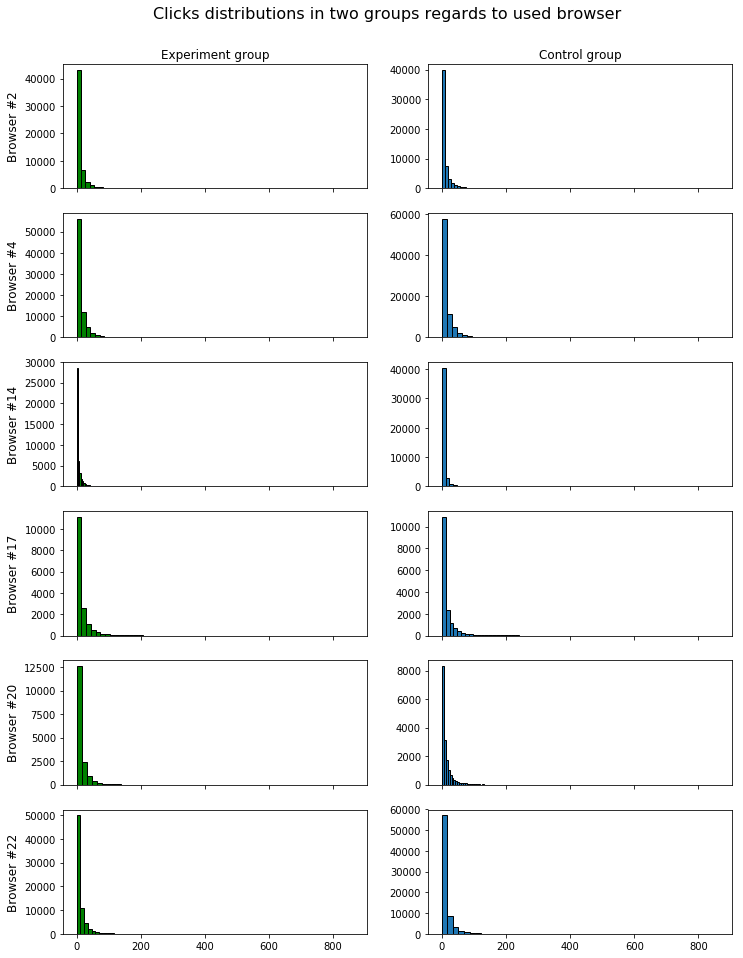

In [200]:
fig, axes = plt.subplots(6, 2, sharex=True, figsize=(12,16))

for ax, browser in zip(axes, e_group.browser.unique()):
    ax[0].hist(e_group[e_group.browser == browser].n_clicks,
               bins=50, color='green')
    ax[1].hist(c_group[c_group.browser == browser].n_clicks,
               bins=50)

# Columns and rows labeling
cols = ['Experiment group', 'Control group']
rows = ['{}'.format(browser) for browser in e_group.browser.unique()]

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, size='large')

fig.suptitle('Clicks distributions in two groups regards to used browser', y=0.93,
             fontsize=16);

Test the similarity of the distributions

In [201]:
p_mannwh = []
for browser in e_group.browser.unique():
    e_browser_clicks = e_group[e_group.browser == browser].n_clicks
    c_browser_clicks = c_group[c_group.browser == browser].n_clicks
    p_val = sts.mannwhitneyu(e_browser_clicks, c_browser_clicks,
                             alternative='two-sided')[1]
    p_mannwh.append(p_val)
    print(browser, p_val)


Browser #2 0.0544877208394482
Browser #4 0.8152123531690997
Browser #14 0.0
Browser #17 0.07480120286021603
Browser #20 0.9073331277747075
Browser #22 0.5148110304420064


Make Holm-Bonferroni correction on multiple tests

In [202]:
import statsmodels.stats.multitest as msts

In [203]:
msts.multipletests(p_mannwh, method='holm')

(array([False, False,  True, False, False, False]),
 array([0.2724386 , 1.        , 0.        , 0.29920481, 1.        ,
        1.        ]),
 0.008512444610847103,
 0.008333333333333333)

___
# 7 V
Для каждого браузера в каждой из двух групп (control и exp) посчитайте долю запросов, в которых пользователь не кликнул ни разу. Это можно сделать, поделив сумму значений n_nonclk_queries на сумму значений n_queries. Умножив это значение на 100, получим процент некликнутых запросов, который можно легче проинтерпретировать.

Сходятся ли результаты проведенного Вами анализа с показателем процента некликнутых запросов? Отметьте все верные утверждения.

- [ ] По всем браузерам мы видим незначительное уменьшение доли некликнутых запросов, поэтому делаем вывод о том, что тестируемое изменение приносит больше вреда, чем пользы.
- [ ] По одному из браузеров мы видим значительное уменьшение доли некликнутых запросов, поэтому уже только на этом основании тестируемое изменение можно рекомендовать к применению для всех пользователей.
- [X] С помощью анализа, проведенного в предыдущем вопросе, мы показали, что тестируемое изменение приводит к статистически значимому отличию только для одного браузера. Для этого браузера на основе данных о доли некликнутых запросов, заключаем, что тестируемое изменение влияет на пользователей позитивно.
- [ ] Тестируемое изменение можно предложить к внедрению только на тот сегмент пользователей, где локализуется изменение, то есть для того браузера, для которого доля некликнутых запросов уменьшилась больше всего. Для прочих браузеров мы не обладаем никакой информацией относительно влияния тестируемого изменения на поведение пользователей.

In [204]:
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [233]:
e_group['noclk_prop'] = 100 * (e_group.n_nonclk_queries / e_group.n_queries)
c_group['noclk_prop'] = 100 * (c_group.n_nonclk_queries / c_group.n_queries)

In [236]:
c_group.groupby('browser')['noclk_prop'].describe()

,count,mean,std,min,25%,50%,75%,max
browser,,,,,,,,
Browser #14,44903.0,60.075333,36.597508,0.0,33.333333,66.666667,100.000000,100.0
Browser #17,16354.0,36.752502,31.859416,0.0,9.090909,33.333333,52.173913,100.0
Browser #2,55793.0,46.412984,34.227066,0.0,20.000000,45.600000,70.000000,100.0
Browser #20,16998.0,39.077033,30.781100,0.0,14.285714,36.363636,56.250000,100.0
Browser #22,71825.0,39.432059,31.803459,0.0,11.111111,37.500000,57.142857,100.0
Browser #4,78681.0,44.476226,29.803951,0.0,25.000000,45.000000,63.157895,100.0


In [235]:
e_group.groupby('browser')['noclk_prop'].describe()

,count,mean,std,min,25%,50%,75%,max
browser,,,,,,,,
Browser #14,44220.0,43.107418,36.582942,0.0,0.000000,40.000000,71.428571,100.0
Browser #17,16253.0,36.658605,31.656000,0.0,9.523810,33.333333,50.000000,100.0
Browser #2,54944.0,45.538104,34.175958,0.0,18.181818,44.444444,66.666667,100.0
Browser #20,16931.0,37.862934,30.751292,0.0,12.500000,33.333333,54.545455,100.0
Browser #22,71080.0,39.072203,31.886542,0.0,10.000000,36.363636,57.142857,100.0
Browser #4,78152.0,43.008149,29.891409,0.0,21.428571,42.857143,61.111111,100.0
